## 課程目標

利用Keras 的 CIFAR10 dataset 來驗證損失函數對於模型精確度的影響

## 範例重點

模型架構的層數

使用何種LOSS function

## 導入必要的libray

In [1]:
import keras
from keras.datasets import cifar10
import numpy as np
np.random.seed(10)
#np.random.seed(10)的作用：使得隨機數據可預測

Using TensorFlow backend.


## 資料準備

In [2]:
#取得Keras CIFAR10 Dataset, 並分成Training 與 Test set
(x_img_train,y_label_train), (x_img_test,y_label_test) = cifar10.load_data()

In [3]:
#確認 CIFAR10 Dataset 資料維度
print("train data:",'images:', x_img_train.shape, " labels:", y_label_train.shape) 
print("test  data:",'images:', x_img_test.shape , " labels:", y_label_test.shape) 

train data: images: (50000, 32, 32, 3)  labels: (50000, 1)
test  data: images: (10000, 32, 32, 3)  labels: (10000, 1)


In [4]:
#資料正規化, 並設定 data array 為浮點數
x_img_train_normalize = x_img_train.astype('float32') / 255.0
x_img_test_normalize = x_img_test.astype('float32') / 255.0

In [5]:
#針對Label 做 ONE HOT ENCODE, 並查看維度資訊
from keras.utils import np_utils
y_label_train_OneHot = np_utils.to_categorical(y_label_train)
y_label_test_OneHot = np_utils.to_categorical(y_label_test)
y_label_test_OneHot.shape

(10000, 10)

## 建立模型

In [6]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D

In [7]:
# 宣告採用序列模型
model = Sequential()

# 卷積層1 - filters=32
# 與池化層1
model.add(Conv2D(filters=32,
                 kernel_size=(3,3),
                 input_shape=(32, 32,3), 
                 activation='relu', 
                 padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# 卷積層2 - filters=64
# 與池化層2
model.add(Conv2D(filters=64, 
                 kernel_size=(3, 3), 
                 activation='relu', 
                 padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# 卷積層3 - filters=128
# 與池化層3
model.add(Conv2D(filters=128, 
                 kernel_size=(3, 3), 
                 activation='relu', 
                 padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# 卷積層4 - filters=256
# 與池化層4
model.add(Conv2D(filters=256, 
                 kernel_size=(3, 3), 
                 activation='relu', 
                 padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

"""
# 建立神經網路(平坦層、隱藏層、輸出層)
"""
model.add(Flatten())

""" 1. fully connected layer """
# 建立全網路連接層
model.add(Dense(512, activation='relu'))
model.add(Dense(512, activation='relu'))

""" 2. output layer """
#建立輸出層
model.add(Dense(10, activation='softmax'))

#檢查model 的STACK
print(model.summary())

W0707 15:53:21.913311 4649829824 deprecation_wrapper.py:119] From /Users/johnsonhuang/anaconda3/envs/tensorflow/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0707 15:53:21.928951 4649829824 deprecation_wrapper.py:119] From /Users/johnsonhuang/anaconda3/envs/tensorflow/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0707 15:53:21.931404 4649829824 deprecation_wrapper.py:119] From /Users/johnsonhuang/anaconda3/envs/tensorflow/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0707 15:53:21.949846 4649829824 deprecation_wrapper.py:119] From /Users/johnsonhuang/anaconda3/envs/tensorflow/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:3976: The name tf.

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 128)         73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 4, 4, 128)         0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 4, 4, 256)         295168    
__________

## 載入之前訓練的模型

In [8]:
try:
    model.load_weights("SaveModel/cifarCnnModel.h5")
    print("載入模型成功!繼續訓練模型")
except :    
    print("載入模型失敗!開始訓練一個新模型")

載入模型失敗!開始訓練一個新模型


## 訓練模型

In [9]:
#模型編譯
model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

W0707 15:53:22.078053 4649829824 deprecation_wrapper.py:119] From /Users/johnsonhuang/anaconda3/envs/tensorflow/lib/python3.6/site-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0707 15:53:22.103084 4649829824 deprecation_wrapper.py:119] From /Users/johnsonhuang/anaconda3/envs/tensorflow/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



In [10]:
#模型訓練, "Train_History" 把訓練過程所得到的數值存起來
train_history = model.fit(x_img_train_normalize, y_label_train_OneHot,
                        validation_split=0.25,
                        epochs=12, batch_size=128, verbose=1)         

# [validation_split = 0.2] validation_split：在0和1之間浮動。用作驗證數據的訓練數據的比例。
# 該模型將訓練數據的這一部分分開，不會對其進行訓練，並將在每個時期結束時評估該數據的損失和任何模型指標。
# [batch_size]：整數或None。每個梯度更新的樣本數。指定，batch_size為128

W0707 15:53:22.221937 4649829824 deprecation.py:323] From /Users/johnsonhuang/anaconda3/envs/tensorflow/lib/python3.6/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0707 15:53:22.308973 4649829824 deprecation_wrapper.py:119] From /Users/johnsonhuang/anaconda3/envs/tensorflow/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 37500 samples, validate on 12500 samples
Epoch 1/12
37500/37500 [==============================] - 70s 2ms/step - loss: 1.6671 - acc: 0.3841 - val_loss: 1.3887 - val_acc: 0.4913
Epoch 2/12
37500/37500 [==============================] - 73s 2ms/step - loss: 1.2519 - acc: 0.5436 - val_loss: 1.1651 - val_acc: 0.5852
Epoch 3/12
37500/37500 [==============================] - 74s 2ms/step - loss: 1.0419 - acc: 0.6258 - val_loss: 1.0208 - val_acc: 0.6399
Epoch 4/12
37500/37500 [==============================] - 77s 2ms/step - loss: 0.8904 - acc: 0.6837 - val_loss: 0.9573 - val_acc: 0.6678
Epoch 5/12
37500/37500 [==============================] - 68s 2ms/step - loss: 0.7707 - acc: 0.7251 - val_loss: 0.9301 - val_acc: 0.6757
Epoch 6/12
37500/37500 [==============================] - 84s 2ms/step - loss: 0.6650 - acc: 0.7646 - val_loss: 0.8774 - val_acc: 0.7047
Epoch 7/12
37500/37500 [==============================] - 88s 2ms/step - loss: 0.5733 - acc: 0.7958 - val_loss: 0.8502 - val_acc

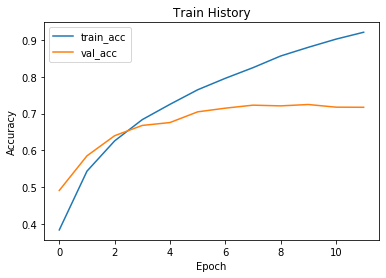

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

# 定義一個繪圖函數
def show_train_history(train_acc, test_acc):
    plt.plot(train_history.history[train_acc])
    plt.plot(train_history.history[test_acc])
    plt.title('Train History')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train_acc', 'val_acc'], loc='upper left')
    plt.show()
    
show_train_history('acc', 'val_acc')

In [12]:
# 定義一個繪圖函數
def show_train_history(train_history, train, validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

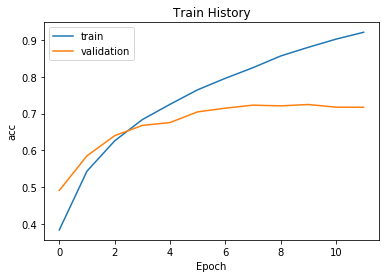

In [13]:
show_train_history(train_history, 'acc', 'val_acc')

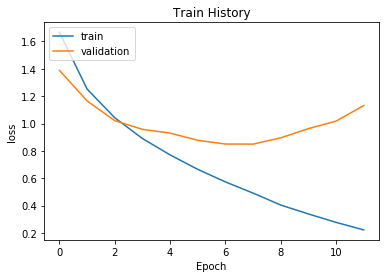

In [14]:
show_train_history(train_history, 'loss', 'val_loss')

In [15]:
# scores = model.evaluate(x_Test_normalize, y_Test_OneHot)

scores = model.evaluate(x_img_test_normalize, y_label_test_OneHot)
print()
print('accuracy=',scores[1])

10000/10000 [==============================] - 4s 431us/step

accuracy= 0.7076


## 作業目標:

1. 藉由固定的 dataset, 來驗證不同loss function

2. Dataset 的特性跟我們選用的loss function 對accrancy 的影響

## 作業重點:

請分別選用 "MSE (mean_squared_error)", "binary _crossentropy"

查看Train/test accurancy and loss rate

## 導入必要的函數

In [16]:
from keras.datasets import cifar10
import numpy as np
np.random.seed(10)

## 資料準備

In [17]:
# 取得Keras Dataset
(x_img_train,y_label_train), (x_img_test,y_label_test) = cifar10.load_data()

In [18]:
# 確認 CIFAR10 Dataset 資料維度
print("train data:", 'images:', x_img_train.shape, " labels:", y_label_train.shape) 
print("test  data:", 'images:', x_img_test.shape,  " labels:", y_label_test.shape) 

train data: images: (50000, 32, 32, 3)  labels: (50000, 1)
test  data: images: (10000, 32, 32, 3)  labels: (10000, 1)


In [19]:
# 資料正規化
x_img_train_normalize = x_img_train.astype('float32') / 255.0
x_img_test_normalize = x_img_test.astype('float32') / 255.0

In [20]:
# 針對 Label 做 ONE HOT ENCODE
from keras.utils import np_utils

y_label_train_OneHot = np_utils.to_categorical(y_label_train)
y_label_test_OneHot = np_utils.to_categorical(y_label_test)

y_label_test_OneHot.shape

(10000, 10)

## 建立模型

In [21]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D

In [22]:
# 宣告採用序列模型
model = Sequential()

# 卷積層1 - filters=32
# 與池化層1
model.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=(32, 32,3), activation='relu', padding='same'))
model.add(Dropout(rate=0.25)) # Dropout
model.add(MaxPooling2D(pool_size=(2, 2)))


# 卷積層2 - filters=64
# 與池化層2
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(Dropout(rate=0.25)) # Dropout
model.add(MaxPooling2D(pool_size=(2, 2)))



"""# 建立神經網路(平坦層、隱藏層、輸出層)"""
model.add(Flatten())
model.add(Dropout(rate=0.25)) # Dropout

""" 1. fully connected layer """
# 建立全網路連接層
model.add(Dense(1024, activation='relu'))
model.add(Dropout(rate=0.25)) # Dropout

""" 2. output layer """
#建立輸出層
model.add(Dense(10, activation='softmax'))



#檢查model 的STACK
print(model.summary())

W0707 16:08:48.667651 4649829824 deprecation.py:506] From /Users/johnsonhuang/anaconda3/envs/tensorflow/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
dropout_2 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 4096)              0         
__________

## 載入之前訓練的模型

In [23]:
try:
    model.load_weights("SaveModel/cifarCnnModel.h5")
    print("載入模型成功!繼續訓練模型")
except :    
    print("載入模型失敗!開始訓練一個新模型")

載入模型失敗!開始訓練一個新模型


## 訓練模型

作業 :

請分別選用 "MSE"(mean_squared_error), "binary_crossentropy"

查看 Train/test accurancy and loss rate

In [24]:
def check_model(loss_function) :
    model.compile(loss = loss_function, optimizer='sgd', metrics=['accuracy'])


    #模型訓練, "Train_History" 把訓練過程所得到的數值存起來
    train_history = model.fit(x_img_train_normalize, 
                              y_label_train_OneHot,
                              validation_split=0.25,
                              epochs=12, 
                              batch_size=128, 
                              verbose=1
                             )         

    # [validation_split = 0.2] validation_split：在0和1之間浮動。用作驗證數據的訓練數據的比例。
    # 該模型將訓練數據的這一部分分開，不會對其進行訓練，並將在每個時期結束時評估該數據的損失和任何模型指標。
    # [batch_size]：整數或None。每個梯度更新的樣本數。指定，batch_size為128




    # 定義一個繪圖函數
    def show_train_history(train_history, train, validation):
        plt.plot(train_history.history[train])
        plt.plot(train_history.history[validation])
        plt.title('Train History')
        plt.ylabel(train)
        plt.xlabel('Epoch')
        plt.legend(['train', 'validation'], loc='upper left')
        plt.show()


    show_train_history(train_history, 'acc', 'val_acc')

    show_train_history(train_history, 'loss', 'val_loss')

    # scores
    scores = model.evaluate(x_img_test_normalize, y_label_test_OneHot)
    print()
    print('accuracy=',scores[1])

Train on 37500 samples, validate on 12500 samples
Epoch 1/12
37500/37500 [==============================] - 62s 2ms/step - loss: 2.1647 - acc: 0.1978 - val_loss: 2.0503 - val_acc: 0.2958
Epoch 2/12
37500/37500 [==============================] - 73s 2ms/step - loss: 1.9545 - acc: 0.2960 - val_loss: 1.9337 - val_acc: 0.3464
Epoch 3/12
37500/37500 [==============================] - 65s 2ms/step - loss: 1.8334 - acc: 0.3470 - val_loss: 1.8405 - val_acc: 0.3822
Epoch 4/12
37500/37500 [==============================] - 67s 2ms/step - loss: 1.7304 - acc: 0.3811 - val_loss: 1.7474 - val_acc: 0.4174
Epoch 5/12
37500/37500 [==============================] - 73s 2ms/step - loss: 1.6500 - acc: 0.4098 - val_loss: 1.6800 - val_acc: 0.4377
Epoch 6/12
37500/37500 [==============================] - 70s 2ms/step - loss: 1.5860 - acc: 0.4310 - val_loss: 1.6488 - val_acc: 0.4512
Epoch 7/12
37500/37500 [==============================] - 82s 2ms/step - loss: 1.5318 - acc: 0.4531 - val_loss: 1.5862 - val_acc

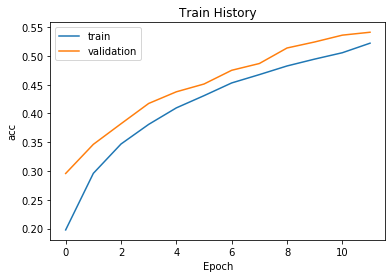

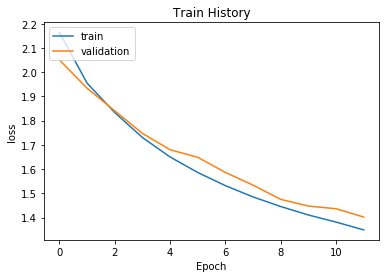

10000/10000 [==============================] - 3s 331us/step

accuracy= 0.5466


In [25]:
loss_function = 'categorical_crossentropy'
check_model(loss_function)

Train on 37500 samples, validate on 12500 samples
Epoch 1/12
37500/37500 [==============================] - 69s 2ms/step - loss: 0.0606 - acc: 0.5313 - val_loss: 0.0629 - val_acc: 0.5497
Epoch 2/12
37500/37500 [==============================] - 69s 2ms/step - loss: 0.0604 - acc: 0.5328 - val_loss: 0.0627 - val_acc: 0.5511
Epoch 3/12
37500/37500 [==============================] - 70s 2ms/step - loss: 0.0604 - acc: 0.5330 - val_loss: 0.0626 - val_acc: 0.5513
Epoch 4/12
37500/37500 [==============================] - 75s 2ms/step - loss: 0.0602 - acc: 0.5367 - val_loss: 0.0627 - val_acc: 0.5495
Epoch 5/12
37500/37500 [==============================] - 70s 2ms/step - loss: 0.0601 - acc: 0.5351 - val_loss: 0.0625 - val_acc: 0.5531
Epoch 6/12
37500/37500 [==============================] - 75s 2ms/step - loss: 0.0602 - acc: 0.5348 - val_loss: 0.0624 - val_acc: 0.5526
Epoch 7/12
37500/37500 [==============================] - 67s 2ms/step - loss: 0.0602 - acc: 0.5363 - val_loss: 0.0624 - val_acc

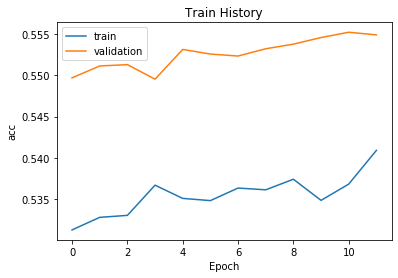

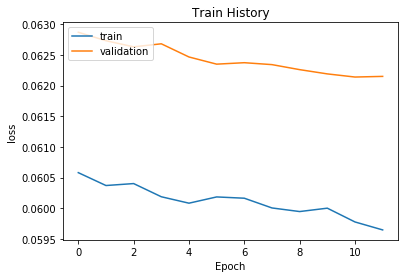

10000/10000 [==============================] - 4s 395us/step

accuracy= 0.5546


In [26]:
loss_function = 'mean_squared_error'
check_model(loss_function)

Train on 37500 samples, validate on 12500 samples
Epoch 1/12
37500/37500 [==============================] - 68s 2ms/step - loss: 0.2025 - acc: 0.9204 - val_loss: 0.2114 - val_acc: 0.9158
Epoch 2/12
37500/37500 [==============================] - 65s 2ms/step - loss: 0.2017 - acc: 0.9209 - val_loss: 0.2114 - val_acc: 0.9159
Epoch 3/12
37500/37500 [==============================] - 67s 2ms/step - loss: 0.2009 - acc: 0.9214 - val_loss: 0.2103 - val_acc: 0.9163
Epoch 4/12
37500/37500 [==============================] - 72s 2ms/step - loss: 0.2017 - acc: 0.9205 - val_loss: 0.2102 - val_acc: 0.9162
Epoch 5/12
37500/37500 [==============================] - 67s 2ms/step - loss: 0.2003 - acc: 0.9214 - val_loss: 0.2096 - val_acc: 0.9163
Epoch 6/12
37500/37500 [==============================] - 69s 2ms/step - loss: 0.2000 - acc: 0.9217 - val_loss: 0.2095 - val_acc: 0.9165
Epoch 7/12
37500/37500 [==============================] - 71s 2ms/step - loss: 0.1992 - acc: 0.9217 - val_loss: 0.2088 - val_acc

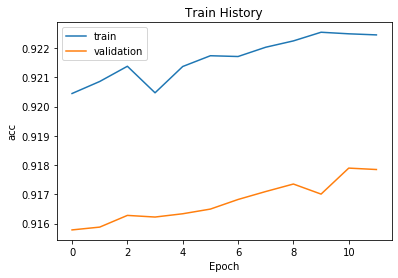

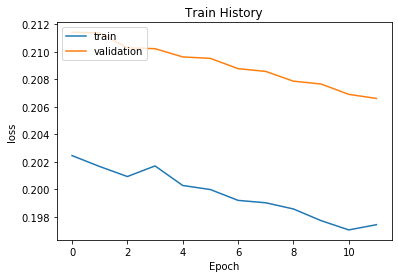

10000/10000 [==============================] - 4s 367us/step

accuracy= 0.9177799755096435


In [30]:
loss_function = 'binary_crossentropy'
check_model(loss_function)

## https://keras.io/losses/

## 參考資料


## <font color="red">神經網絡優化 : 自定義損失函數，交叉熵</font>


## 1. [TensorFlow筆記-06-神經網絡優化-損失函數，自定義損失函數，交叉熵](https://blog.csdn.net/qq_40147863/article/details/82015360)



## 2. [使用損失函數](https://keras.io/losses/)





## 延伸閱讀 : 自訂損失函數 1/2

對於預測優酪乳日銷量問題，如果預測銷量大於實際銷量則會損失成本；如果預測銷量小於實際銷量則會損失利潤。

在實際生活中，往往製造一盒優酪乳的成本和銷售一盒優酪乳的利潤不是等價的。因此，需要使用符合該問題的自訂損失函數

自訂損失函數為：

loss = Σnf(y_, y)

其中，損失函數成分段函數：損失函數表示若預測結果y小於標準答案y_，損失函數為利潤乘以預測結果y與標準答案之差若預測結果y大於標準答案y_，

損失函數為成本乘以預測結果y與標準答案之差用Tensorflow函數表示為：

loss = tf.reduce_sum(tf.where(tf.greater(y, y_), COST*(y-y_), PROFIT*(y_-y))) 

第1種情況：若優酪乳成本為1元，優酪乳銷售利潤為9元，則製造成本小於優酪乳利潤，因此希望預測結果y多一些

# 定義損失函數使得預測少了的損失大，於是模型應該偏向多的放心預測

loss = tf.reduce_sum(tf.where(tf.greater(y, y_), COST*(y-y_), PROFIT*(y_-y)))

train_step = tf.train.GradientDescentOptimizer(0.001).minimize(loss)



第2種情況：若優酪乳成本為9元，優酪乳銷售利潤為1元，則製造利潤小於優酪乳成本，因此希望預# 重新定義損失函數使得預測多了的損失大，於是模型應該偏向少的方向預測 

loss = tf.reduce_sum(tf.where(tf.greater(y, y_), COST*(y-y_), PROFIT*(y_-y)))

train_step = tf.train.GradientDescentOptimizer(0.001).minimize(loss)


    # 其他優化方法     

        # train_step = tf.train.GMomentumOptimizer(0.001, 0.9).minimize(loss)    

        # train_step = tf.train.AdamOptimizer(0.001).minimize(loss)
        


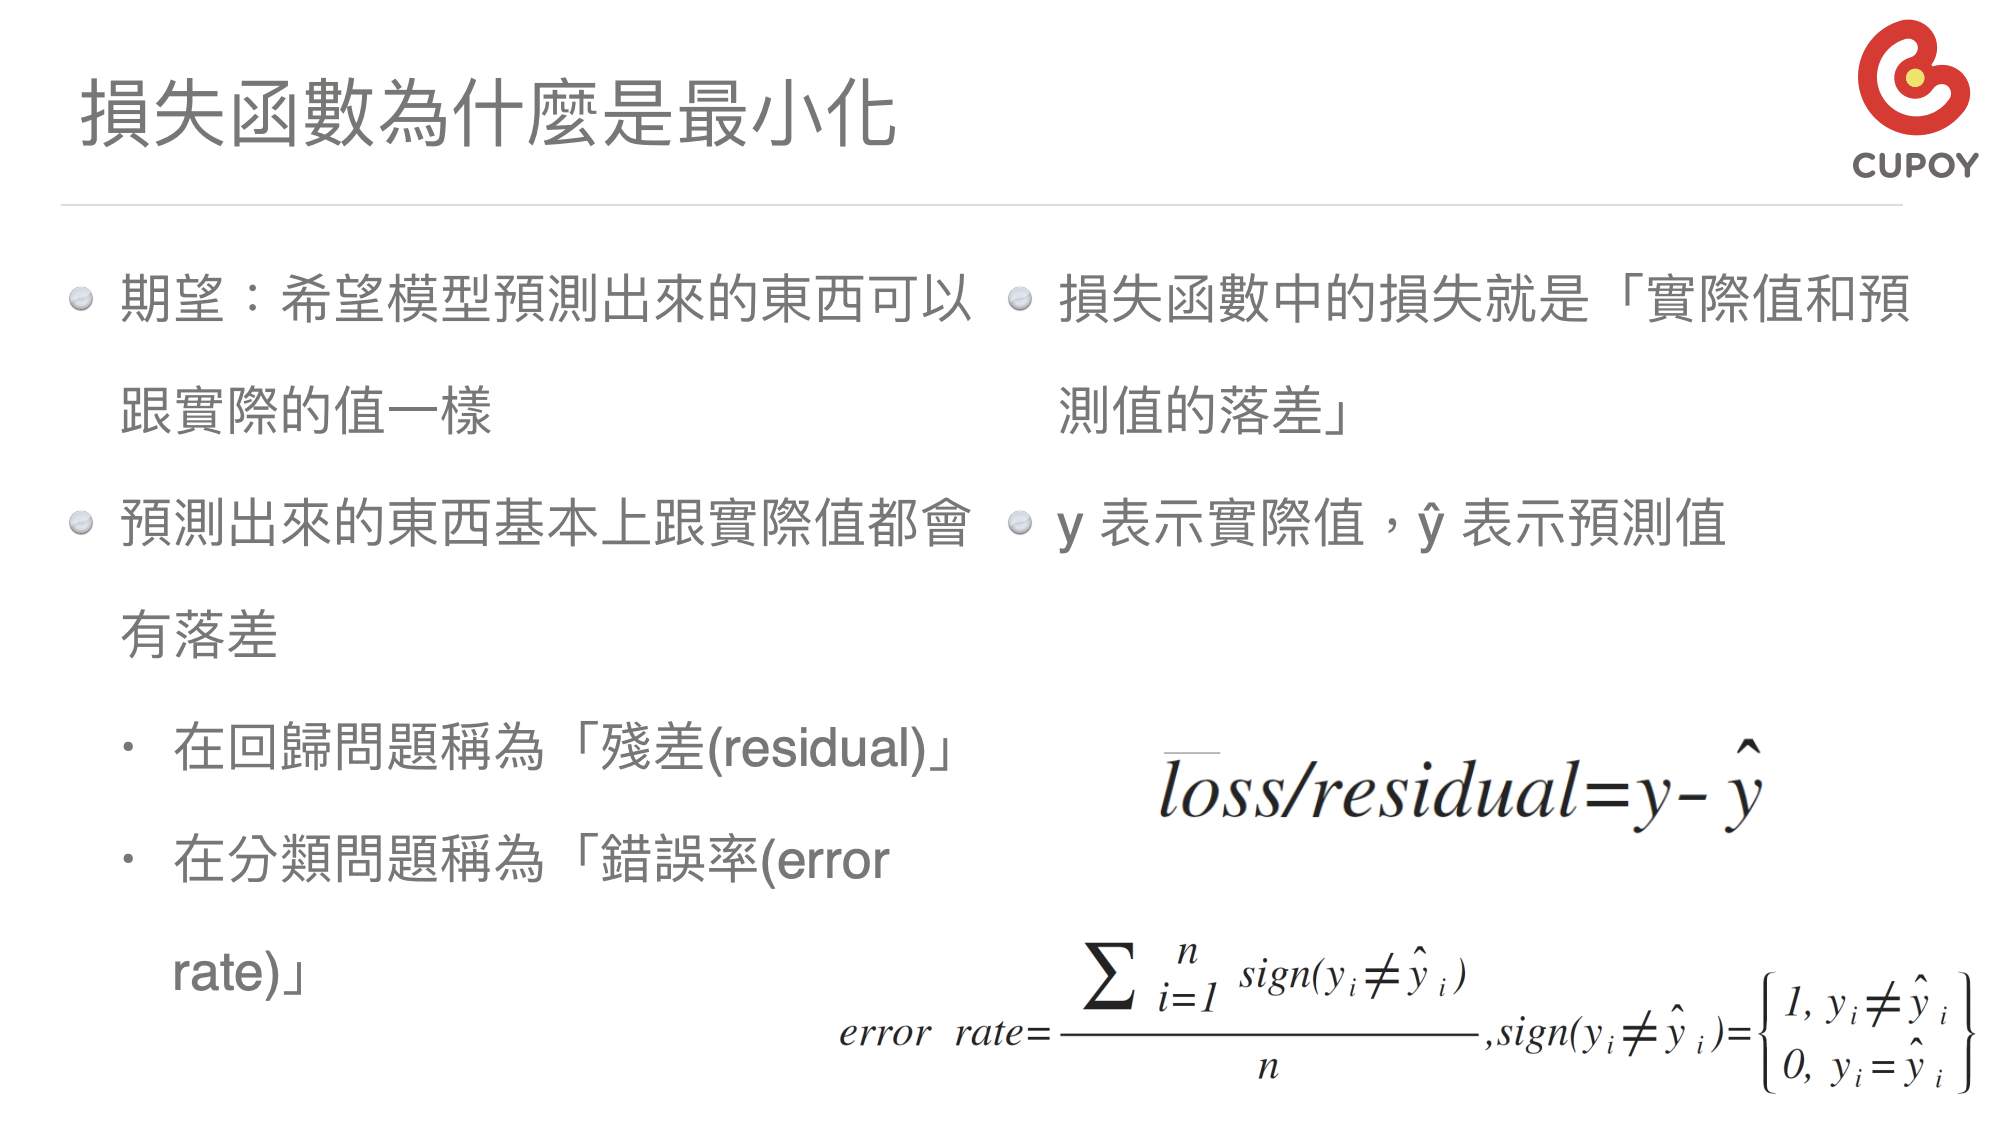

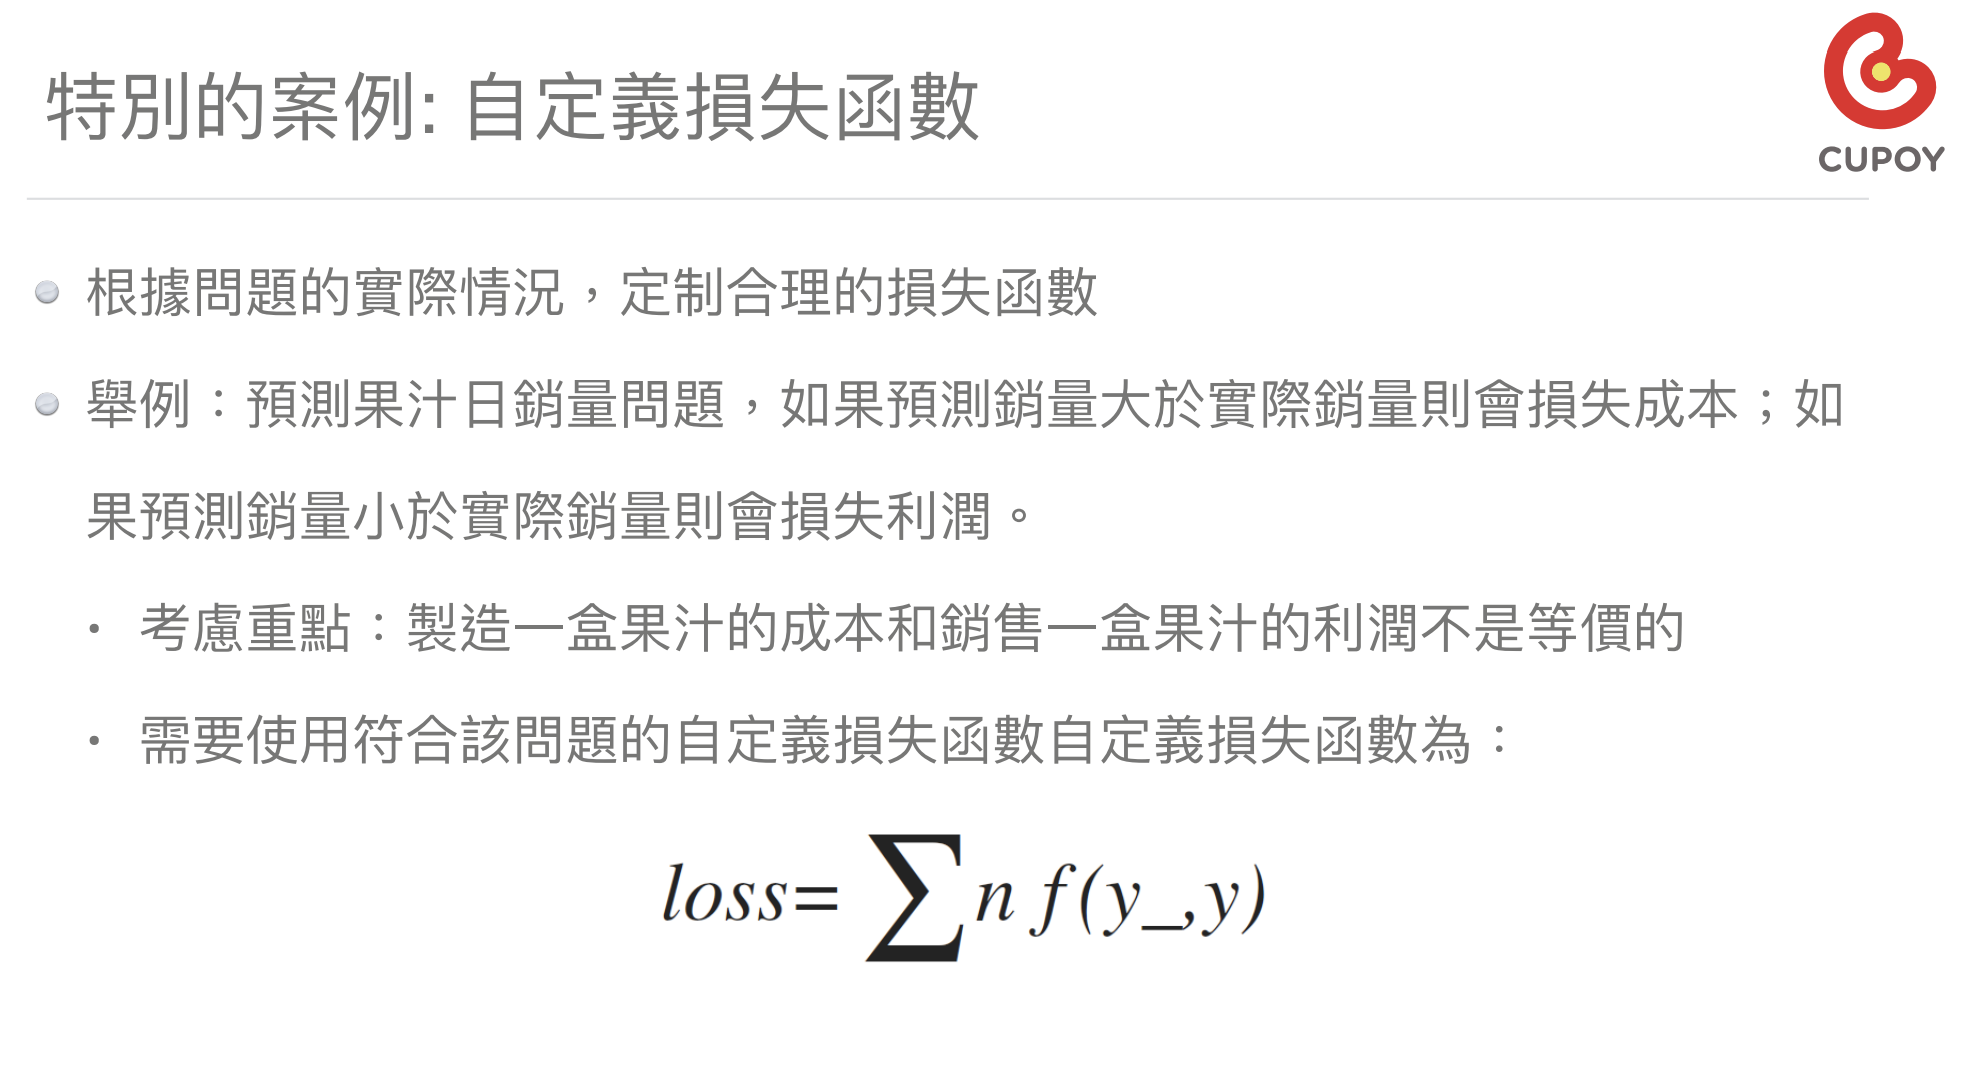

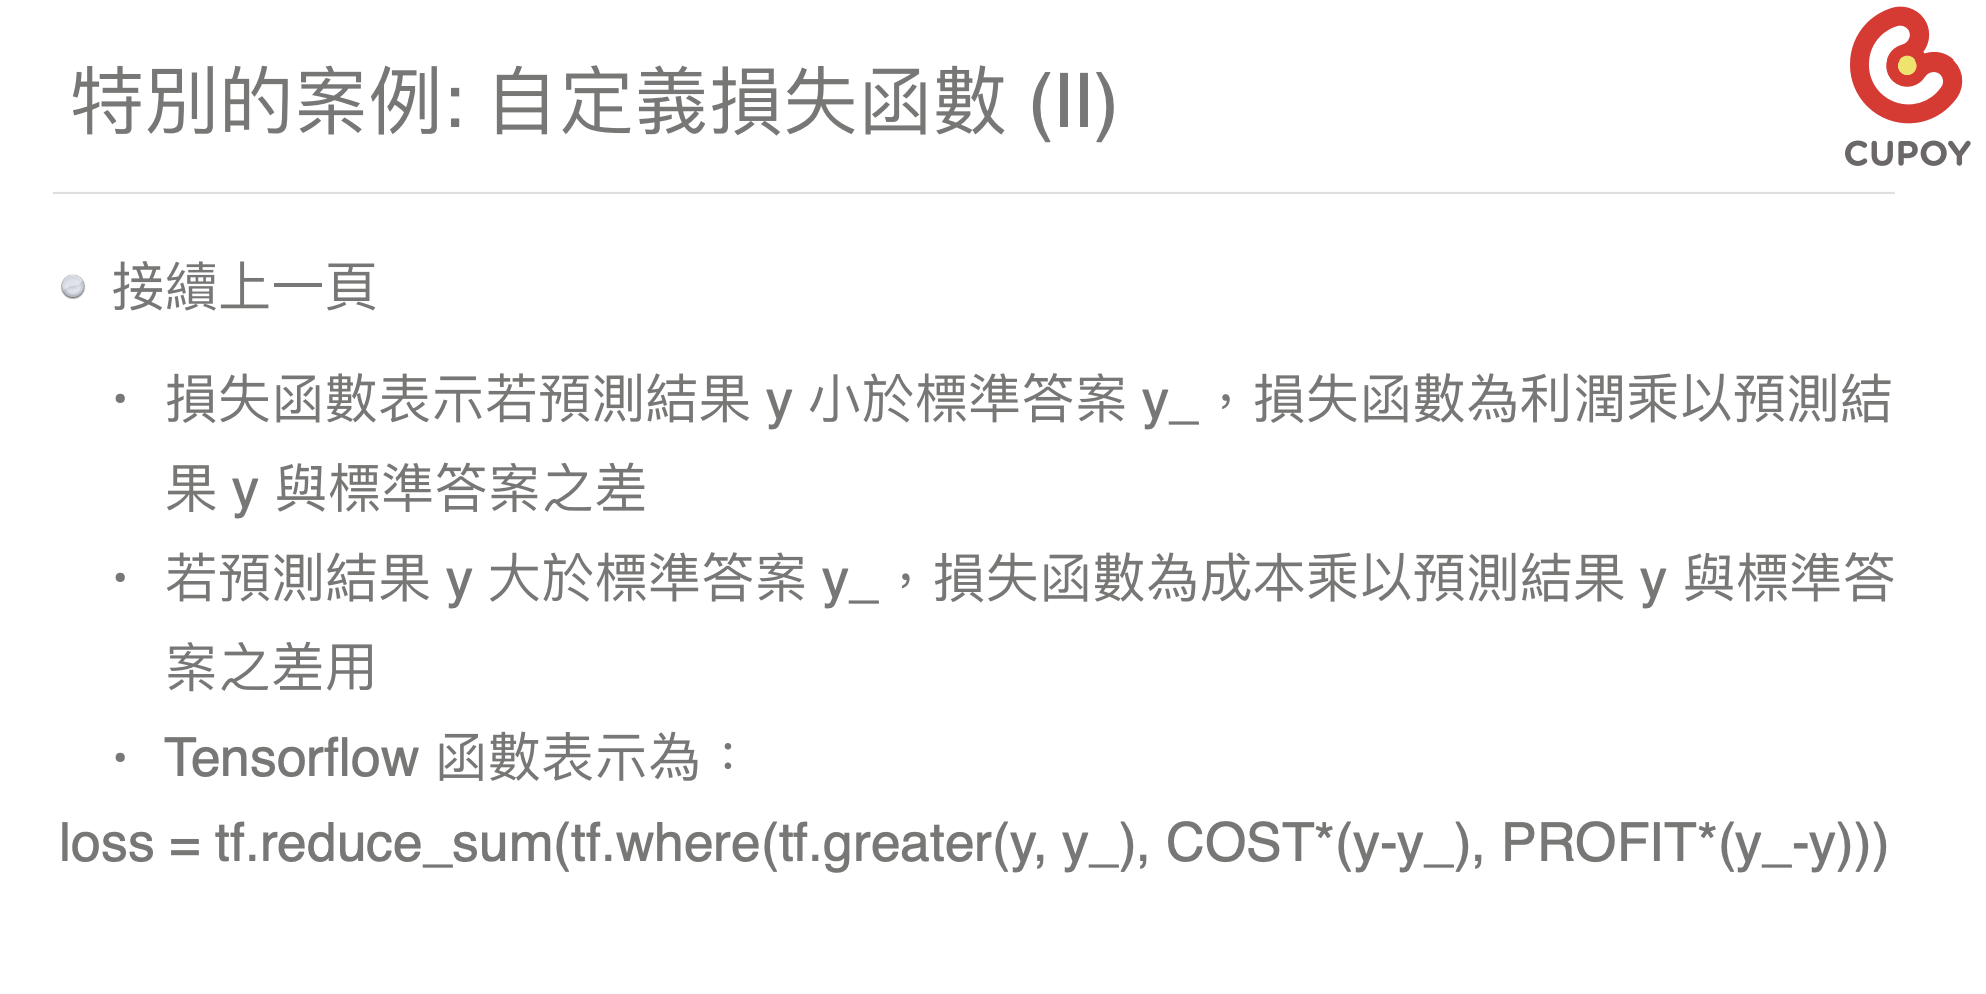

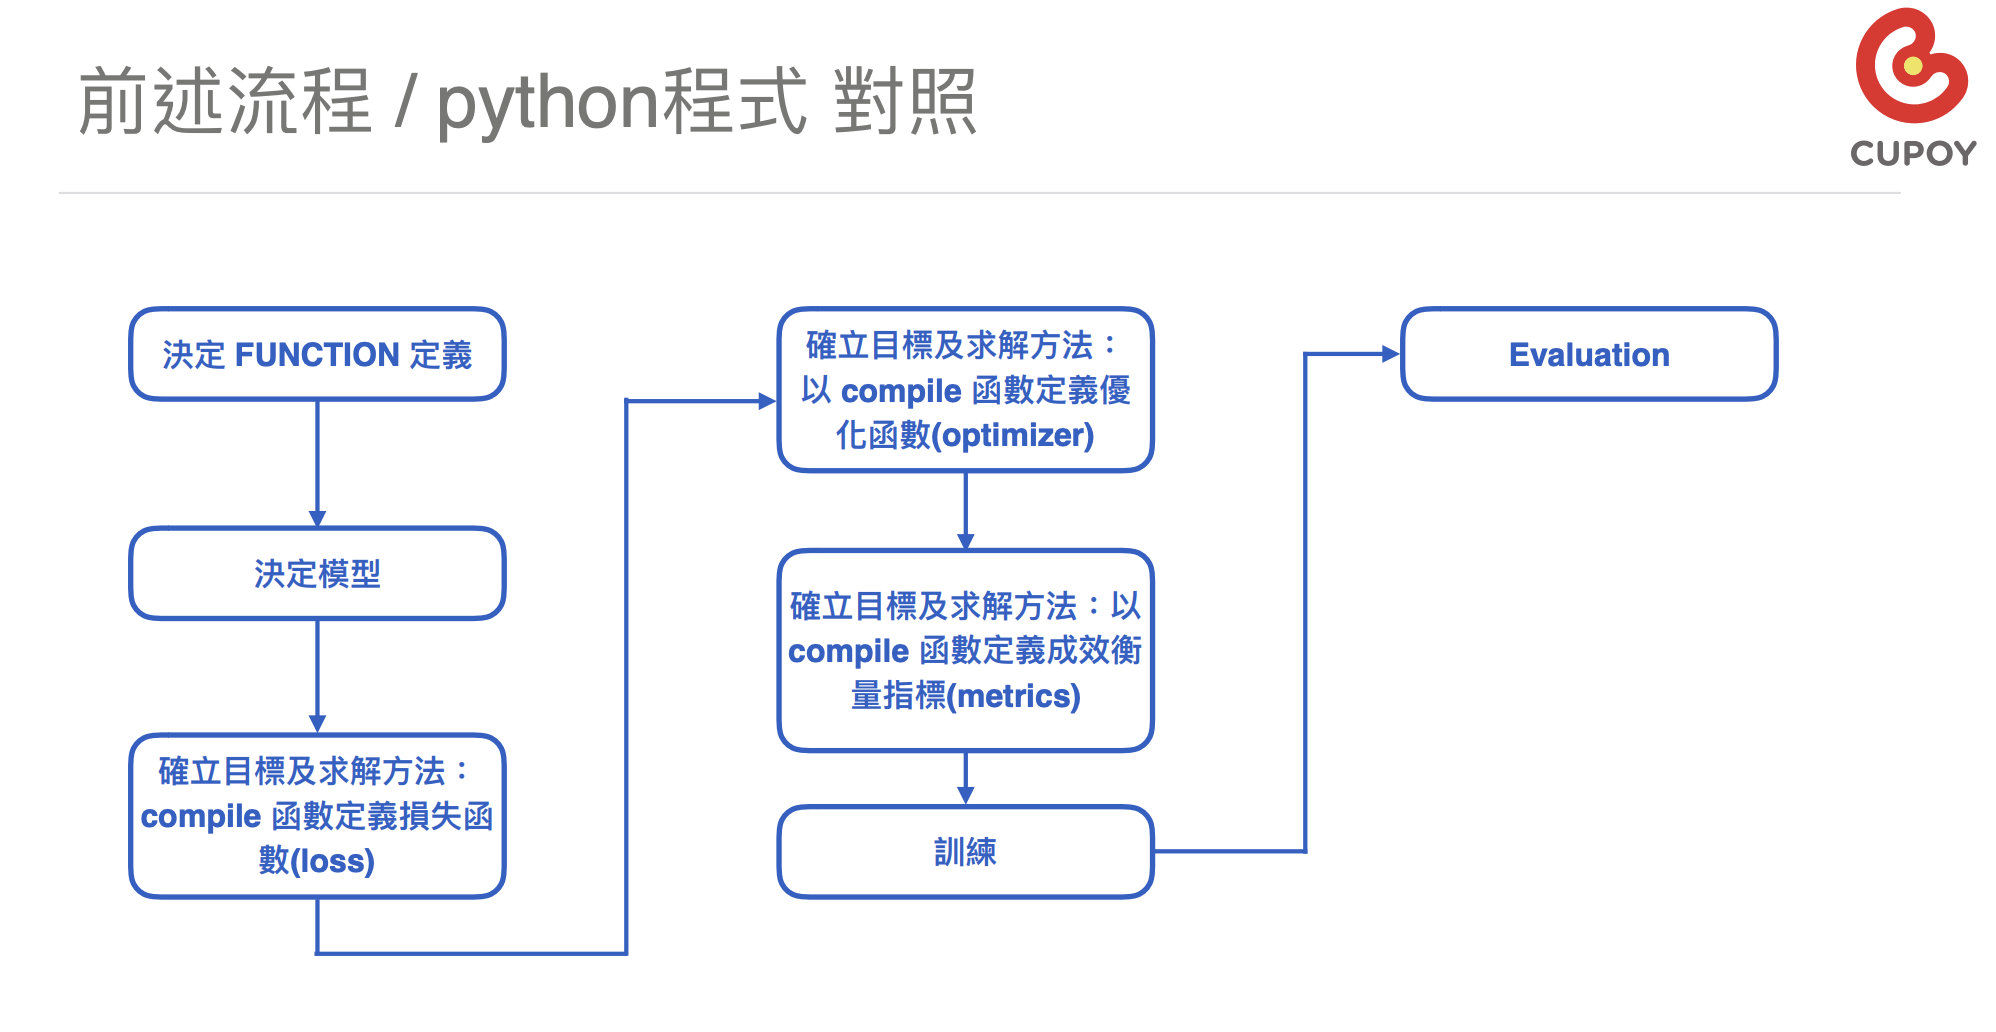